In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import string
import spacy
import random
import seaborn as sns
import numpy as np

<IPython.core.display.Javascript object>

In [3]:
data = pd.read_csv("./data/base_treinamento.txt", encoding="utf-8")
data

,texto,emocao
0,este trabalho é agradável,alegria
1,gosto de ficar no seu aconchego,alegria
2,fiz a adesão ao curso hoje,alegria
3,eu sou admirada por muitos,alegria
4,adoro como você,alegria
...,...,...
191,estou chocado e amedrontado com este assassina...,medo
192,é preciso afugenta com ímpeto este medo do inf...,medo
193,políticos usam suas forças para afugentar e am...,medo
194,o objetivo disso e apenas me amedrontar mais,medo


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='emocao', ylabel='count'>

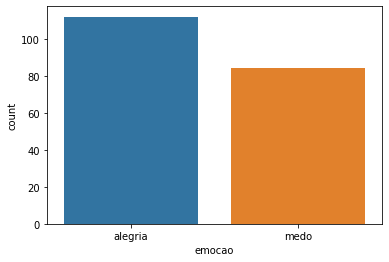

<IPython.core.display.Javascript object>

In [4]:
sns.countplot(data.emocao, label="Contagem")

In [5]:
pln = spacy.load("pt")

<IPython.core.display.Javascript object>

In [6]:
def preprocess(text):
    from spacy.lang.pt.stop_words import STOP_WORDS

    _list = [token.lemma_ for token in pln(text.lower())]
    return " ".join(
        [
            str(word)
            for word in _list
            if word not in STOP_WORDS
            and word not in string.punctuation
            and not word.isdigit()
        ]
    )


preprocess("Estou aPrendendo 1 10 23 processamento de linguagem natura.")

'aprender processamento linguagem natura'

<IPython.core.display.Javascript object>

In [7]:
data.texto = data.texto.apply(preprocess)
data

,texto,emocao
0,trabalhar agradável,alegria
1,gostar ficar o aconchegar,alegria
2,o adesão cursar hoje,alegria
3,admirar,alegria
4,adorar comer,alegria
...,...,...
191,chocar e amedrontar assassinato brutal,medo
192,precisar afugentar ímpeto medo infernar,medo
193,político suar forçar parir afugentar e amedron...,medo
194,o objetivo e amedrontar,medo


<IPython.core.display.Javascript object>

In [8]:
training = []
for text, emotion in zip(data.texto, data.emocao):
    if emotion == "alegria":
        dic = {"ALEGRIA": True, "MEDO": False}
    elif emotion == "medo":
        dic = {"ALEGRIA": False, "MEDO": True}

    training.append([text, dic.copy()])


<IPython.core.display.Javascript object>

In [30]:
model = spacy.blank("pt")
category = model.create_pipe("textcat")
category.add_label("ALEGRIA")
category.add_label("MEDO")
model.add_pipe(category)
history = []

<IPython.core.display.Javascript object>

In [40]:
import threading
from ipywidgets import IntProgress
from IPython.display import display

max_epoch = 600

f = IntProgress(min=0, max=(max_epoch*7)) 
display(f)  

model.begin_training()
for epoch in range(max_epoch):
    random.shuffle(training)
    losses = {}
    for batch in spacy.util.minibatch(training, 30):
        f.value += 1 
        text = [model(text) for text, entities in batch]
        annotations = [{'cats': entities} for text, entities in batch]
        model.update(text, annotations, losses=losses)
    if epoch % 100 == 0:
        history.append(losses)


IntProgress(value=0, max=4200)

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Erro')

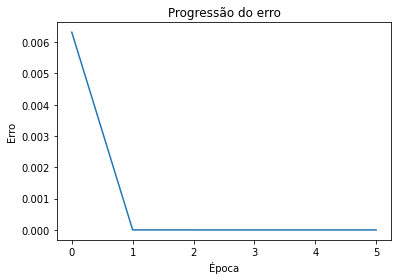

<IPython.core.display.Javascript object>

In [41]:
history_loss = np.array([i.get("textcat") for i in history])
import matplotlib.pyplot as plt

plt.plot(history_loss)
plt.title("Progressão do erro")
plt.xlabel("Época")
plt.ylabel("Erro")

In [42]:
!rm -rfd modelo-testing

<IPython.core.display.Javascript object>

In [43]:
model.to_disk("modelo-testing")

<IPython.core.display.Javascript object>

In [52]:
model_load = spacy.load("modelo-testing")
print(model_load(preprocess("eu adoro cor dos seus olhos")).cats)
print(model_load(preprocess("nossa consigo fazer isso!")).cats)
print(model_load(preprocess("vou consigir fazer isso!")).cats)

{'ALEGRIA': 0.9998735189437866, 'MEDO': 0.000239942513871938}
{'ALEGRIA': 0.04624013230204582, 'MEDO': 0.9318918585777283}
{'ALEGRIA': 0.9938719272613525, 'MEDO': 0.006748680025339127}


<IPython.core.display.Javascript object>